<a href="https://colab.research.google.com/github/9143nithinreddy/QUANTUM_COMPUTING/blob/main/QC(lab_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.3 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def create_oracle(num_solutions, num_qubits):
    oracle = QuantumCircuit(num_qubits)

    # Example: mark the first `num_solutions` solutions as "marked"
    for i in range(num_solutions):
        oracle.x(i)  # Flip the first `num_solutions` qubits to mark them
    oracle = oracle.to_gate(label="Oracle")

    return oracle

def quantum_counting(num_solutions, num_qubits):
    # Create a quantum circuit with counting qubits
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    # Prepare counting qubits in |0>
    qc.h(range(num_qubits))

    # Prepare auxiliary qubit
    qc.x(num_qubits)
    qc.h(num_qubits)

    # Create and apply the oracle
    oracle = create_oracle(num_solutions, num_qubits)
    qc.append(oracle, range(num_qubits + 1))

    # Inverse Quantum Fourier Transform (QFT)
    qc.h(range(num_qubits))
    for i in range(num_qubits):
        for j in range(i):
            qc.cp(-np.pi / (2 ** (i - j)), j, i)
        qc.h(i)

    # Measure the counting qubits
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

# Parameters
num_solutions = 3  # Change this for different numbers of solutions
num_qubits = 3     # Change this for precision

# Create and run the circuit
qc = quantum_counting(num_solutions, num_qubits)
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)

# Plot the results
plot_histogram(counts)


ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

In [3]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.4 MB/s eta 0:00:00


In [4]:
from qiskit import QuantumCircuit, Aer, execute # Aer should now be importable
from qiskit.visualization import plot_histogram
import numpy as np

ImportError: cannot import name 'Aer' from 'qiskit' (/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py)

<ipython-input-11-02fad6bb8a0d>:54: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


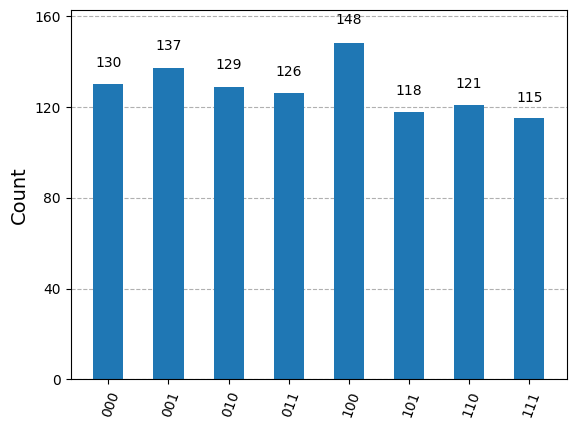

In [11]:
!pip install qiskit-aer
!pip install qiskit[all]
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np
from qiskit.primitives import Sampler

def create_oracle(num_solutions, num_qubits):
    oracle = QuantumCircuit(num_qubits)

    for i in range(num_solutions):
        oracle.x(i)
    oracle = oracle.to_gate(label="Oracle")

    return oracle

def quantum_counting(num_solutions, num_qubits):
    qc = QuantumCircuit(num_qubits + 1, num_qubits)

    qc.h(range(num_qubits))

    qc.x(num_qubits)
    qc.h(num_qubits)

    oracle = create_oracle(num_solutions, num_qubits)
    qc.append(oracle, range(num_qubits))

    qc.h(range(num_qubits))
    for i in range(num_qubits):
        for j in range(i):
            qc.cp(-np.pi / (2 ** (i - j)), j, i)
        qc.h(i)

    qc.measure(range(num_qubits), range(num_qubits))

    return qc

num_solutions = 3
num_qubits = 3

qc = quantum_counting(num_solutions, num_qubits)

sampler = Sampler()
result = sampler.run(qc, shots=1024).result()

quasi_probs = result.quasi_dists[0]

counts = {format(i, "0" + str(num_qubits) + "b"): int(round(prob * 1024))
          for i, prob in quasi_probs.items()}

plot_histogram(counts)